# Regression In-Class Demo

This demo illustrates a simple linear regression analysis using Python's `scikit-learn` library. We will use the Atir et al. (2015) study 1a and 1b dataset, fit a linear regression model, and visualize the results.

Atir, S., Rosenzweig, E., & Dunning, D. (2015). When knowledge knows no bounds: Self-perceived
expertise predicts claims of impossible knowledge. _Psychological Science_, 26, 1295-1303.

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

# Uncomment and Set directories if you are using dataset from your own local machine
# data_dir = '<insert path to directory where dataset is located>'
# os.chdir(data_dir)


# Load dataset into dataframe
file_id = '0Bz-rhZ21ShvOTnM5YmJQOHpZNzA'
resource_key = '0-d12XfcSZxwDJc-PKPwC0rQ'

# Construct a direct download link
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}&resourcekey={resource_key}'
df = pd.read_csv(direct_link) 

print(df.head())

   id  order_of_tasks  self_perceived_knowledge  overclaiming_proportion  \
0   1               1                       5.5                 0.444444   
1   7               1                       4.5                 0.555556   
2  10               1                       3.5                 0.166667   
3  12               1                       6.0                 0.722222   
4  14               1                       2.5                 0.388889   

   accuracy  FINRA_score  
0  0.250000            4  
1  0.194444            4  
2  0.347222            5  
3 -0.055556            4  
4  0.166667            3  


### Descriptives

We first start from correlation analysis. Here we introduce `pairplot` from `seaborn` to visualize the scatterplot and distribution of each variable.

<Figure size 1000x800 with 0 Axes>

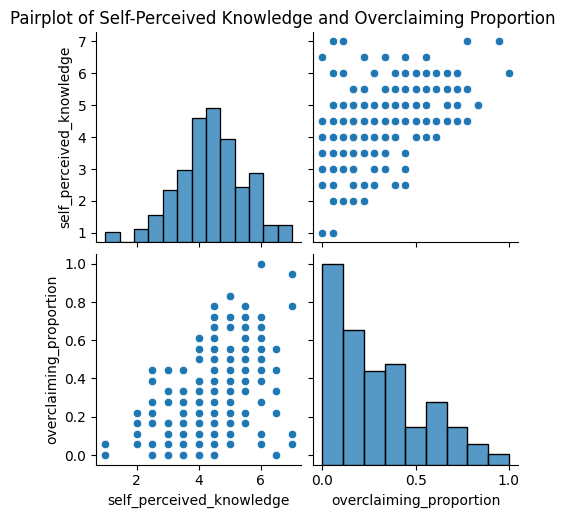

In [2]:
features = ["self_perceived_knowledge", "overclaiming_proportion"]

# Pairplot to visualize relationships
plt.figure(figsize=(10, 8))
sns.pairplot(df[features])
plt.suptitle('Pairplot of Self-Perceived Knowledge and Overclaiming Proportion', y=1.02)
plt.show()

It seems there is a pretty strong positive correlation between self-perceived knowledge and overclaiming proportion. Next, we will try to use correlation coefficient to quantify the strength of this relationship.

In [3]:
# Correlation analysis
corr = df[features].corr()
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                          self_perceived_knowledge  overclaiming_proportion
self_perceived_knowledge                   1.00000                  0.48115
overclaiming_proportion                    0.48115                  1.00000


### Model Setup

Now we are heading to regression analysis. We will use `statsmodels` to fit a linear regression model predicting overclaiming proportion from self-perceived knowledge.

`statsmodels` is a really powerful library for statistical modeling in Python. It provides a wide range of statistical models, including linear regression, generalized linear models, time series analysis, and more. It also offers extensive statistical tests and diagnostic tools to evaluate model performance. You may see  them in your future projects or classes.

Today we are using `OLS` from `statsmodels.formula.api` to fit a simple linear regression model. The general syntax is 

```python
import statsmodels.formula.api as smf
model = smf.ols(
    formula = 'Y ~ X1 + X2 + ... + Xn', 
    data=df).fit()
print(model.summary())
```


Here formula represents the regression equation specification. Before the tilde `~` is the dependent variable (outcome), and after the tilde are the independent variables (predictors). You can include multiple predictors separated by `+` signs.


For a formula of 
$$
\text{Overclaiming} = \beta_0 + \beta_1 \text{SelfPerceivedKnowledge} + \beta_2 \text{Accuracy} + \epsilon
$$
, the syntax for would be:

```python
import statsmodels.formula.api as smf

model = smf.ols(
    formula = 'overclaiming ~ self_perceived_knowledge + accuracy', 
    data=df).fit()

print(model.summary())
```



Or we can use `statsmodels.api` to fit the same model. The syntax is a bit different:

```python
import statsmodels.api as sm
X = df[['self_perceived_knowledge', 'accuracy']]  # Replace with your independent
y = df['overclaiming']  # Replace with your dependent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
# fit the model
model = sm.OLS(y, X).fit()
print(model.summary())
```

### Fitting a model

In [ ]:
import statsmodels.api as sm
# statsmodels for regression analysis
X = df[['self_perceived_knowledge', 'accuracy']]  # Replace with your independent variables
y = df['overclaiming']  # Replace with your dependent variable 
X = sm.add_constant(X)  # Adds a constant term to the predictor

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the results
print(model.summary())

In [4]:
# Build up the model

model_bivariate = smf.ols('overclaiming_proportion ~ self_perceived_knowledge', data=df).fit()
print(model_bivariate.summary())

                               OLS Regression Results                              
Dep. Variable:     overclaiming_proportion   R-squared:                       0.232
Model:                                 OLS   Adj. R-squared:                  0.228
Method:                      Least Squares   F-statistic:                     60.25
Date:                     Mon, 02 Feb 2026   Prob (F-statistic):           4.22e-13
Time:                             13:49:04   Log-Likelihood:                 35.399
No. Observations:                      202   AIC:                            -66.80
Df Residuals:                          200   BIC:                            -60.18
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Output interpretations: 

- `coef` represents the estimated regression coefficients
- `std err` represents the standard errors
- `t` represents the t-statistics for each coefficient, P>|t| represents the p-values associated with the t-statistics
- `[0.025 0.975]` represents the 95% confidence intervals for each coefficient
- `Prob (F-statistic)` represents the p-value for the overall model fit (F-test)
- `R-squared` represents the goodness-of-fit of the model

Take a moment to think about how to interpret the model.

In [5]:
# Build up the model

model_multi = smf.ols('overclaiming_proportion ~ self_perceived_knowledge + accuracy', data=df).fit()
print(model_multi.summary())



                               OLS Regression Results                              
Dep. Variable:     overclaiming_proportion   R-squared:                       0.705
Model:                                 OLS   Adj. R-squared:                  0.702
Method:                      Least Squares   F-statistic:                     237.7
Date:                     Mon, 02 Feb 2026   Prob (F-statistic):           1.80e-53
Time:                             13:49:05   Log-Likelihood:                 132.08
No. Observations:                      202   AIC:                            -258.2
Df Residuals:                          199   BIC:                            -248.2
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

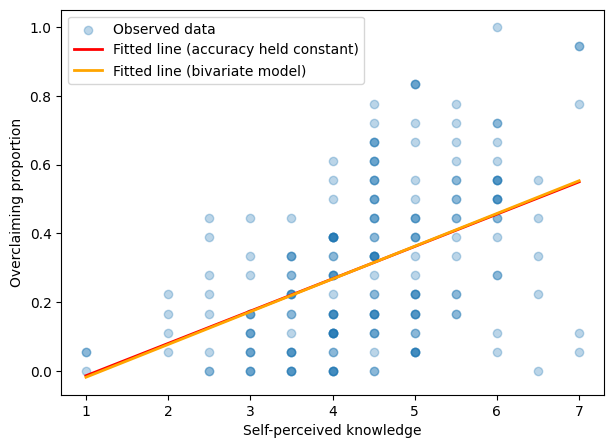

In [18]:
## Visualize the holding at constant

# 1. Create a sequence of self-perceived knowledge values
spk_range = np.linspace(
    df['self_perceived_knowledge'].min(),
    df['self_perceived_knowledge'].max(),
    100
)

# 2. Hold accuracy constant (mean is standard)
accuracy_const = df['accuracy'].mean()
FINRA_const = df['FINRA_score'].mean()

# 3. Build prediction DataFrame
pred_df = pd.DataFrame({
    'self_perceived_knowledge': spk_range,
    'accuracy': accuracy_const,
    'FINRA_score': FINRA_const
})

# 4. Predict fitted values
pred_df['overclaiming_hat'] = model_multi.predict(pred_df)
pred_df['overclaiming_hat_bivar'] = model_bivariate.predict(pred_df)

# 5. Plot
plt.figure(figsize=(7,5))
plt.scatter(df['self_perceived_knowledge'],
            df['overclaiming_proportion'],
            alpha=0.3,
            label='Observed data')

plt.plot(pred_df['self_perceived_knowledge'],
         pred_df['overclaiming_hat'],
         color='red',
         linewidth=2,
         label='Fitted line (accuracy held constant)')
plt.plot(pred_df['self_perceived_knowledge'],
         pred_df['overclaiming_hat_bivar'],
         color='orange',
         linewidth=2, 
         label='Fitted line (bivariate model)')

plt.xlabel('Self-perceived knowledge')
plt.ylabel('Overclaiming proportion')
plt.legend()
plt.show()


### Model predictions and visualization

What regression can do but t-tests cannot is to predict the outcome variable based on the predictors. Here we will visualize the regression line fitted by the model using `.predict()` method.

In [13]:
# Create a variable called y_pred to store model predictions
# Then call the .predict() method on the model object to generate predictions
# You need to ensure the input to .predict() matches the format of the data used to fit the model

df['y_pred'] = model_bivariate.predict(df)

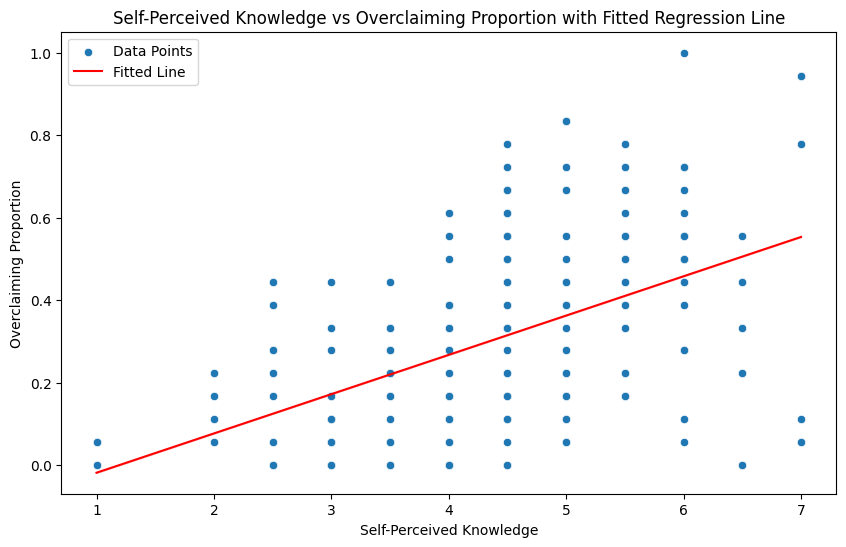

In [14]:
# Display the scatterplot and fitted regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='self_perceived_knowledge', y='overclaiming_proportion', data=df, label='Data Points')
sns.lineplot(x='self_perceived_knowledge', y='y_pred', data=df, color='red', label='Fitted Line')
plt.title('Self-Perceived Knowledge vs Overclaiming Proportion with Fitted Regression Line')
plt.xlabel('Self-Perceived Knowledge')
plt.ylabel('Overclaiming Proportion')
plt.legend()
plt.show()